In [225]:
import pandas as pd
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C-soft")
print(data)

     TK      K      G             J      R      r      E      ΔH     ΔS
0   298   0.35   2.58  8.051000e-14  3.612  6.228  0.037   34.62  107.2
1   310   0.53   1.63  8.051000e-14  3.612  6.228  0.037   34.62  107.2
2   318   0.86   0.39  8.051000e-14  3.612  6.228  0.037   34.62  107.2
3   298   0.17   4.46  7.756000e-14  3.590  5.428  0.077   52.51  160.6
4   310   0.29   3.20  7.756000e-14  3.590  5.428  0.077   52.51  160.6
5   318   0.65   1.15  7.756000e-14  3.590  5.428  0.077   52.51  160.6
6   298   0.20   3.94  8.038000e-14  3.611  5.788  0.056   57.57  179.2
7   310   0.36   2.61  8.038000e-14  3.611  5.788  0.056   57.57  179.2
8   318   0.91   0.24  8.038000e-14  3.611  5.788  0.056   57.57  179.2
9   298   5.22  -4.10  1.223000e-13  3.873  7.089  0.026  -90.39 -290.3
10  310   0.95   0.14  1.223000e-13  3.873  7.089  0.026  -90.39 -290.3
11  318   0.55   1.60  1.223000e-13  3.873  7.089  0.026  -90.39 -290.3
12  298   2.32  -2.08  8.494000e-14  3.645  5.480  0.080  -16.79

In [226]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:7]
y = data.iloc[:,8]
X = X.to_numpy()
y = y.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=5)
X,y

(array([[ 2.980e+02,  3.500e-01,  2.580e+00,  8.051e-14,  3.612e+00,
          6.228e+00,  3.700e-02],
        [ 3.100e+02,  5.300e-01,  1.630e+00,  8.051e-14,  3.612e+00,
          6.228e+00,  3.700e-02],
        [ 3.180e+02,  8.600e-01,  3.900e-01,  8.051e-14,  3.612e+00,
          6.228e+00,  3.700e-02],
        [ 2.980e+02,  1.700e-01,  4.460e+00,  7.756e-14,  3.590e+00,
          5.428e+00,  7.700e-02],
        [ 3.100e+02,  2.900e-01,  3.200e+00,  7.756e-14,  3.590e+00,
          5.428e+00,  7.700e-02],
        [ 3.180e+02,  6.500e-01,  1.150e+00,  7.756e-14,  3.590e+00,
          5.428e+00,  7.700e-02],
        [ 2.980e+02,  2.000e-01,  3.940e+00,  8.038e-14,  3.611e+00,
          5.788e+00,  5.600e-02],
        [ 3.100e+02,  3.600e-01,  2.610e+00,  8.038e-14,  3.611e+00,
          5.788e+00,  5.600e-02],
        [ 3.180e+02,  9.100e-01,  2.400e-01,  8.038e-14,  3.611e+00,
          5.788e+00,  5.600e-02],
        [ 2.980e+02,  5.220e+00, -4.100e+00,  1.223e-13,  3.873e+00,
    

In [227]:
import numpy as np
from sklearn import preprocessing

std = preprocessing.StandardScaler()
std.fit(X)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

std.mean_,std.scale_ #fit之后求出了原始数据每列均值和标准差

(array([ 3.08666667e+02,  8.70688889e+00, -1.93133333e+00,  1.10384667e-13,
         3.77680000e+00,  5.65626667e+00,  9.80666667e-02]),
 array([8.21921867e+00, 1.54150795e+01, 4.20082193e+00, 4.33281503e-14,
        2.05082813e-01, 5.75056225e-01, 7.71055265e-02]))

# 非线性回归

In [232]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 非线性回归
ployfeat = PolynomialFeatures(degree=2)  # 根据degree的值转换为相应的多项式（非线性回归）
x_p = ployfeat.fit_transform(X_train)
model = LinearRegression()
model.fit(x_p, y_train)

print(ployfeat.get_feature_names_out())
print(model.coef_)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3'
 'x0 x4' 'x0 x5' 'x0 x6' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6'
 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6'
 'x4^2' 'x4 x5' 'x4 x6' 'x5^2' 'x5 x6' 'x6^2']
[-9.92830651e+03 -9.79273551e-10  1.77983020e-08  1.74051133e-08
 -2.91631761e+05  2.61051016e+05 -4.35807712e+04 -7.61080656e+04
  1.44126250e-10  5.17028977e-09  2.37460355e-09  9.04835065e-09
 -4.36525521e-09 -5.73009649e-09 -1.21663156e-08  2.43346901e-09
  9.88338751e-09 -7.57364391e-08  6.19636972e-08  1.79243058e-09
  4.96698936e-11 -1.16039976e-09 -1.49626588e-07  1.25456553e-07
  1.33888353e-09  2.09357028e-08 -5.48126040e+05  6.46874603e+05
  3.68672624e+05  6.14619977e+05 -1.62762828e+05 -2.19926083e+05
 -3.33405463e+05 -4.07467882e+04 -2.00746679e+05 -1.80669400e+05]


In [233]:
model.predict(ployfeat.transform(X_test)),y_test

(array([-351.39999998, -427.1       ,   -9.4       ,  160.6       ,
         -17.9       ]),
 array([-351.4, -427.1,   -9.4,  160.6,  -17.9]))

In [223]:
test = np.array([298,0.35,2.58,0.00000000000008051,3.6120,6.2280,0.0370]).reshape((1,-1))
# test = np.array([310,0.53,1.63,0.00000000000008051,3.6120,6.2280,0.0370]).reshape((1,-1))
# test = std.transform(test)
# test = ployfeat.transform(test)
model.predict(test)

ValueError: X has 7 features, but LinearRegression is expecting 35 features as input.

可解释方差( explained_variance_score)。用于评判回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。

In [234]:
from sklearn.metrics import explained_variance_score
score = explained_variance_score(model.predict(ployfeat.transform(X_test)), y_test)
print(score)

1.0


平均绝对误差（Mean Absolute Error，MAE），用来描述预测值和真实值的差值,用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好

 虽然平均绝对误差能够获得一个评价值，但是并不知道这个值代表模型拟合是优还是劣，只有通过对比才能达到效果。

In [236]:

from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(model.predict(ployfeat.transform(X_test)), y_test)
print(score)
#0.20581698417663574

4.009924836623213e-09


均方差（Mean squared error，MSE），该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。



In [237]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(model.predict(ployfeat.transform(X_test)), y_test)
print(score)

4.8887094791182463e-17


由于MSE与我们的目标变量的量纲不一致，为了保证量纲一致性，我们需要对MSE进行开方，即均方根误差（RMSE）：均方根误差 Root Mean Squared Error（RMSE）。

　RMSE与MAE对比：RMSE相当于L2范数，MAE相当于L1范数。次数越高，计算结果就越与较大的值有关，而忽略较小的值，所以这就是为什么RMSE针对异常值更敏感的原因（即有一个预测值与真实值相差很大，那么RMSE就会很大）

In [238]:
from sklearn.metrics import mean_squared_error
import math
mse_score = mean_squared_error(model.predict(ployfeat.transform(X_test)), y_test)
rmse_score = math.sqrt(mse_score)
print(rmse_score)

6.991930691245621e-09


 R2 Score又称为the coefficient of determination。判断的是预测模型和真实数据的拟合程度，最佳值为1，同时可为负值。如果结果是0，就说明我们的模型跟瞎猜差不多。如果结果是1，就说明我们模型无错误。如果结果是0-1之间的数，数值就是评判 我们模型的好坏程度的标准。如果结果是负数。说明我们的模型还不如瞎猜。

In [240]:
from sklearn.metrics import r2_score
score = r2_score(model.predict(ployfeat.transform(X_test)), y_test)
print(score)

1.0


# K折验证，加上各类指标

In [42]:
def print_formula(feature_names,coefs):
    equation = "y = "
    for i, name in enumerate(feature_names):
        coef = coefs[i]
        if coef >= 0:
            eq = " + " + str(coef) + "*" + name  
        else:
            eq = " - " + str(-coef) + "*" + name
        equation += eq
    
    equation += " + " + str(model.intercept_)  

    
    print(equation)

y =  + 0.0*1 - 3.2321512656081595*x0 + 2.9182412590907094*x1 + 37.81672172694458*x2 + 1698.3068895846857*x3 - 1181.512321423636*x4 - 384.8859642945956*x5 - 855.4998312973121*x6 + -32.92034844416265
(0.83227532417903, 90.49477333762495, 107.06487223228164, 0.4126896849530105)
y =  + 0.0*1 - 0.08628218833873547*x0 - 23.291529401516463*x1 + 16.047018771607068*x2 + 1672.3277940179382*x3 - 1164.3382590735628*x4 - 379.6560126309942*x5 - 840.6978623013409*x6 + -34.54477497218379
(0.8550323043765607, 66.90400281011456, 111.47148926316522, 0.776310875060401)
y =  + 0.0*1 - 5.091998293484288*x0 - 17.286012468263976*x1 + 25.968298228876094*x2 + 1721.8586264583826*x3 - 1196.705797969768*x4 - 388.2039793267732*x5 - 863.7613749064732*x6 + -39.52528445165768
(0.7400953605959015, 21.373463341405486, 27.577270039434048, 0.7122457201017101)
y =  + 0.0*1 - 6.907503851251427*x0 - 16.829738498496692*x1 + 29.563501918450882*x2 + 1720.2266934520915*x3 - 1193.5321836253079*x4 - 391.7697400347828*x5 - 868.3810

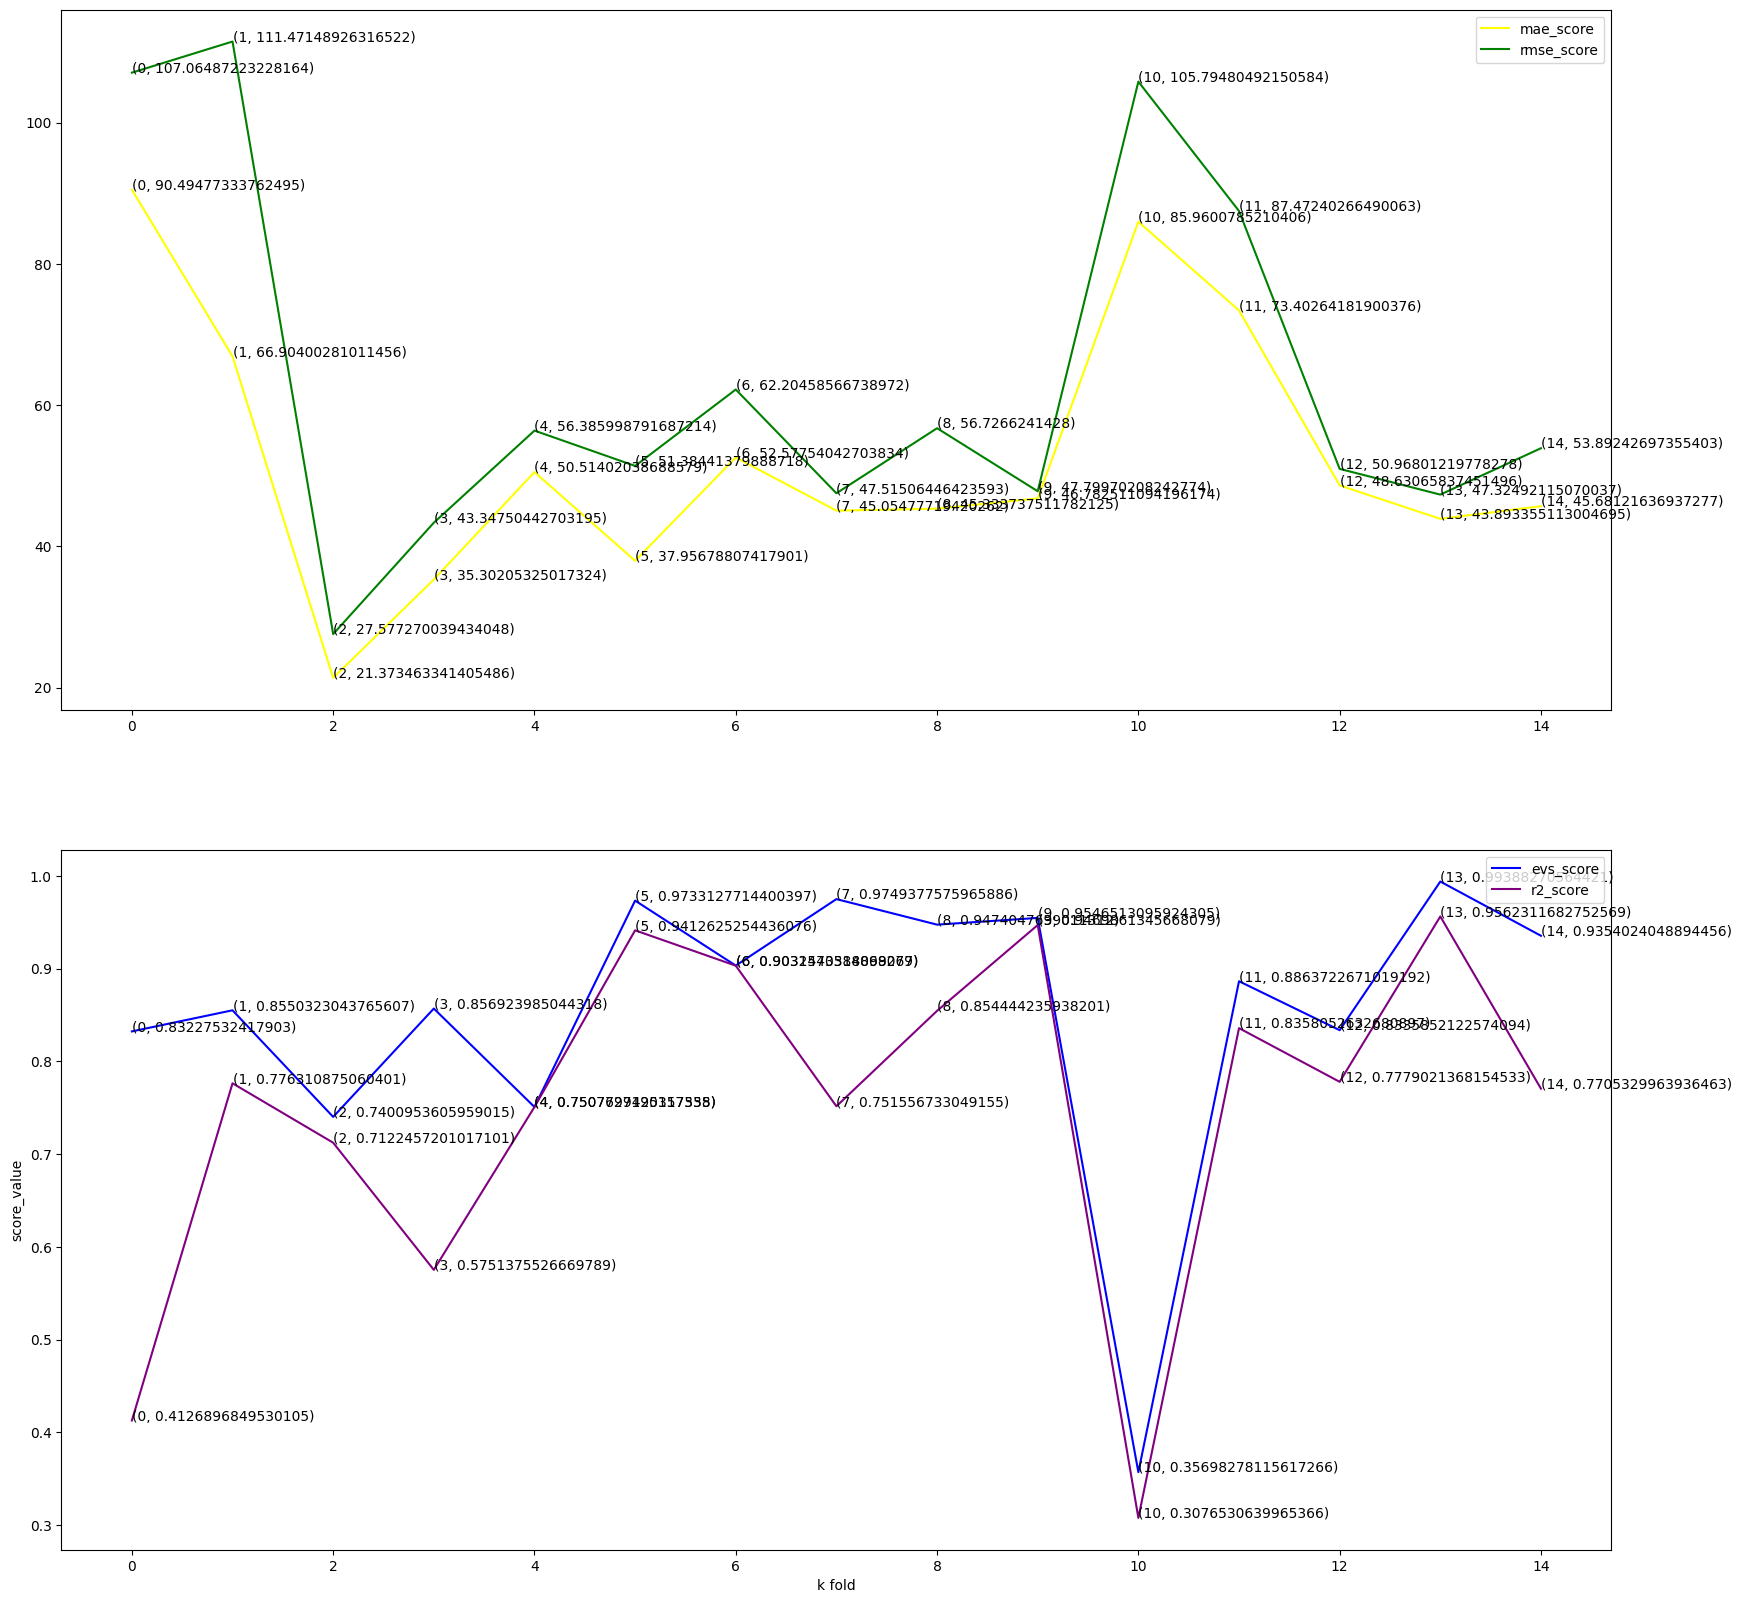

In [43]:
%matplotlib inline

import pandas as pd
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
# 计算不同的指标
def calc_metrics(y_test,y_pred):
    evs_score = explained_variance_score(y_pred, y_test)
    mae_score = mean_absolute_error(y_pred,y_test)
    rmse_score = math.sqrt(mean_squared_error(y_pred, y_test))
    r2score = r2_score(y_pred, y_test)
    return evs_score,mae_score,rmse_score,r2score

# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C-soft")
# 读取X，y
X = data.iloc[:,0:7]
y = data.iloc[:,8]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)

kfold_splits_num = 15
# k折训练，计算
kf = KFold(n_splits=kfold_splits_num, shuffle=True, random_state=42)

# 画图
plt.figure(figsize=(20,20))

evs_score_list,mae_score_list,rmse_score_list,r2score_list = [],[],[],[]
for index,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 非线性回归
    ployfeat = PolynomialFeatures(degree=1)  # 根据degree的值转换为相应的多项式（非线性回归）
    model = LinearRegression()
    model.fit(ployfeat.fit_transform(X_train), y_train)
    y_pred = model.predict(ployfeat.fit_transform(X_test))
    scores = calc_metrics(y_test,y_pred)
    evs_score_list.append(scores[0])
    mae_score_list.append(scores[1])
    rmse_score_list.append(scores[2])
    r2score_list.append(scores[3])
    print_formula(ployfeat.get_feature_names_out(),model.coef_)
    print(scores)

plt.subplot(2,1,1)
plt.plot(range(kfold_splits_num),mae_score_list,label="mae_score",c="yellow")
plt.plot(range(kfold_splits_num),rmse_score_list,label="rmse_score",c="g")
plt.legend()

for x,y in zip(range(kfold_splits_num), mae_score_list):
    plt.annotate(str((x,y)), (x,y))
    
for x,y in zip(range(kfold_splits_num), rmse_score_list):
    plt.annotate(str((x,y)), (x,y))

plt.subplot(2,1,2)
plt.plot(range(kfold_splits_num),evs_score_list,label="evs_score",c="b")
plt.plot(range(kfold_splits_num),r2score_list,label="r2_score",c="purple")

# 给每个点添加坐标信息  
for x,y in zip(range(kfold_splits_num), evs_score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)


for x,y in zip(range(kfold_splits_num), r2score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)

print(max(evs_score_list),max(r2score_list))

plt.legend()
plt.xlabel("k fold")
plt.ylabel("score_value")
plt.show()
# print("Average MSE:", np.mean(mse))
# y = -6.785330073915951*x0 - 18.09630840318899*x1 + 22.986929398620585*x2 + 1735.636762147014*x3 - 1206.628790458231*x4 - 388.4477561003439*x5 - 870.6157224871534*x6 - 41.87955700753805

# Kfold ΔH

0.7182837310594169 0.6904997039472538


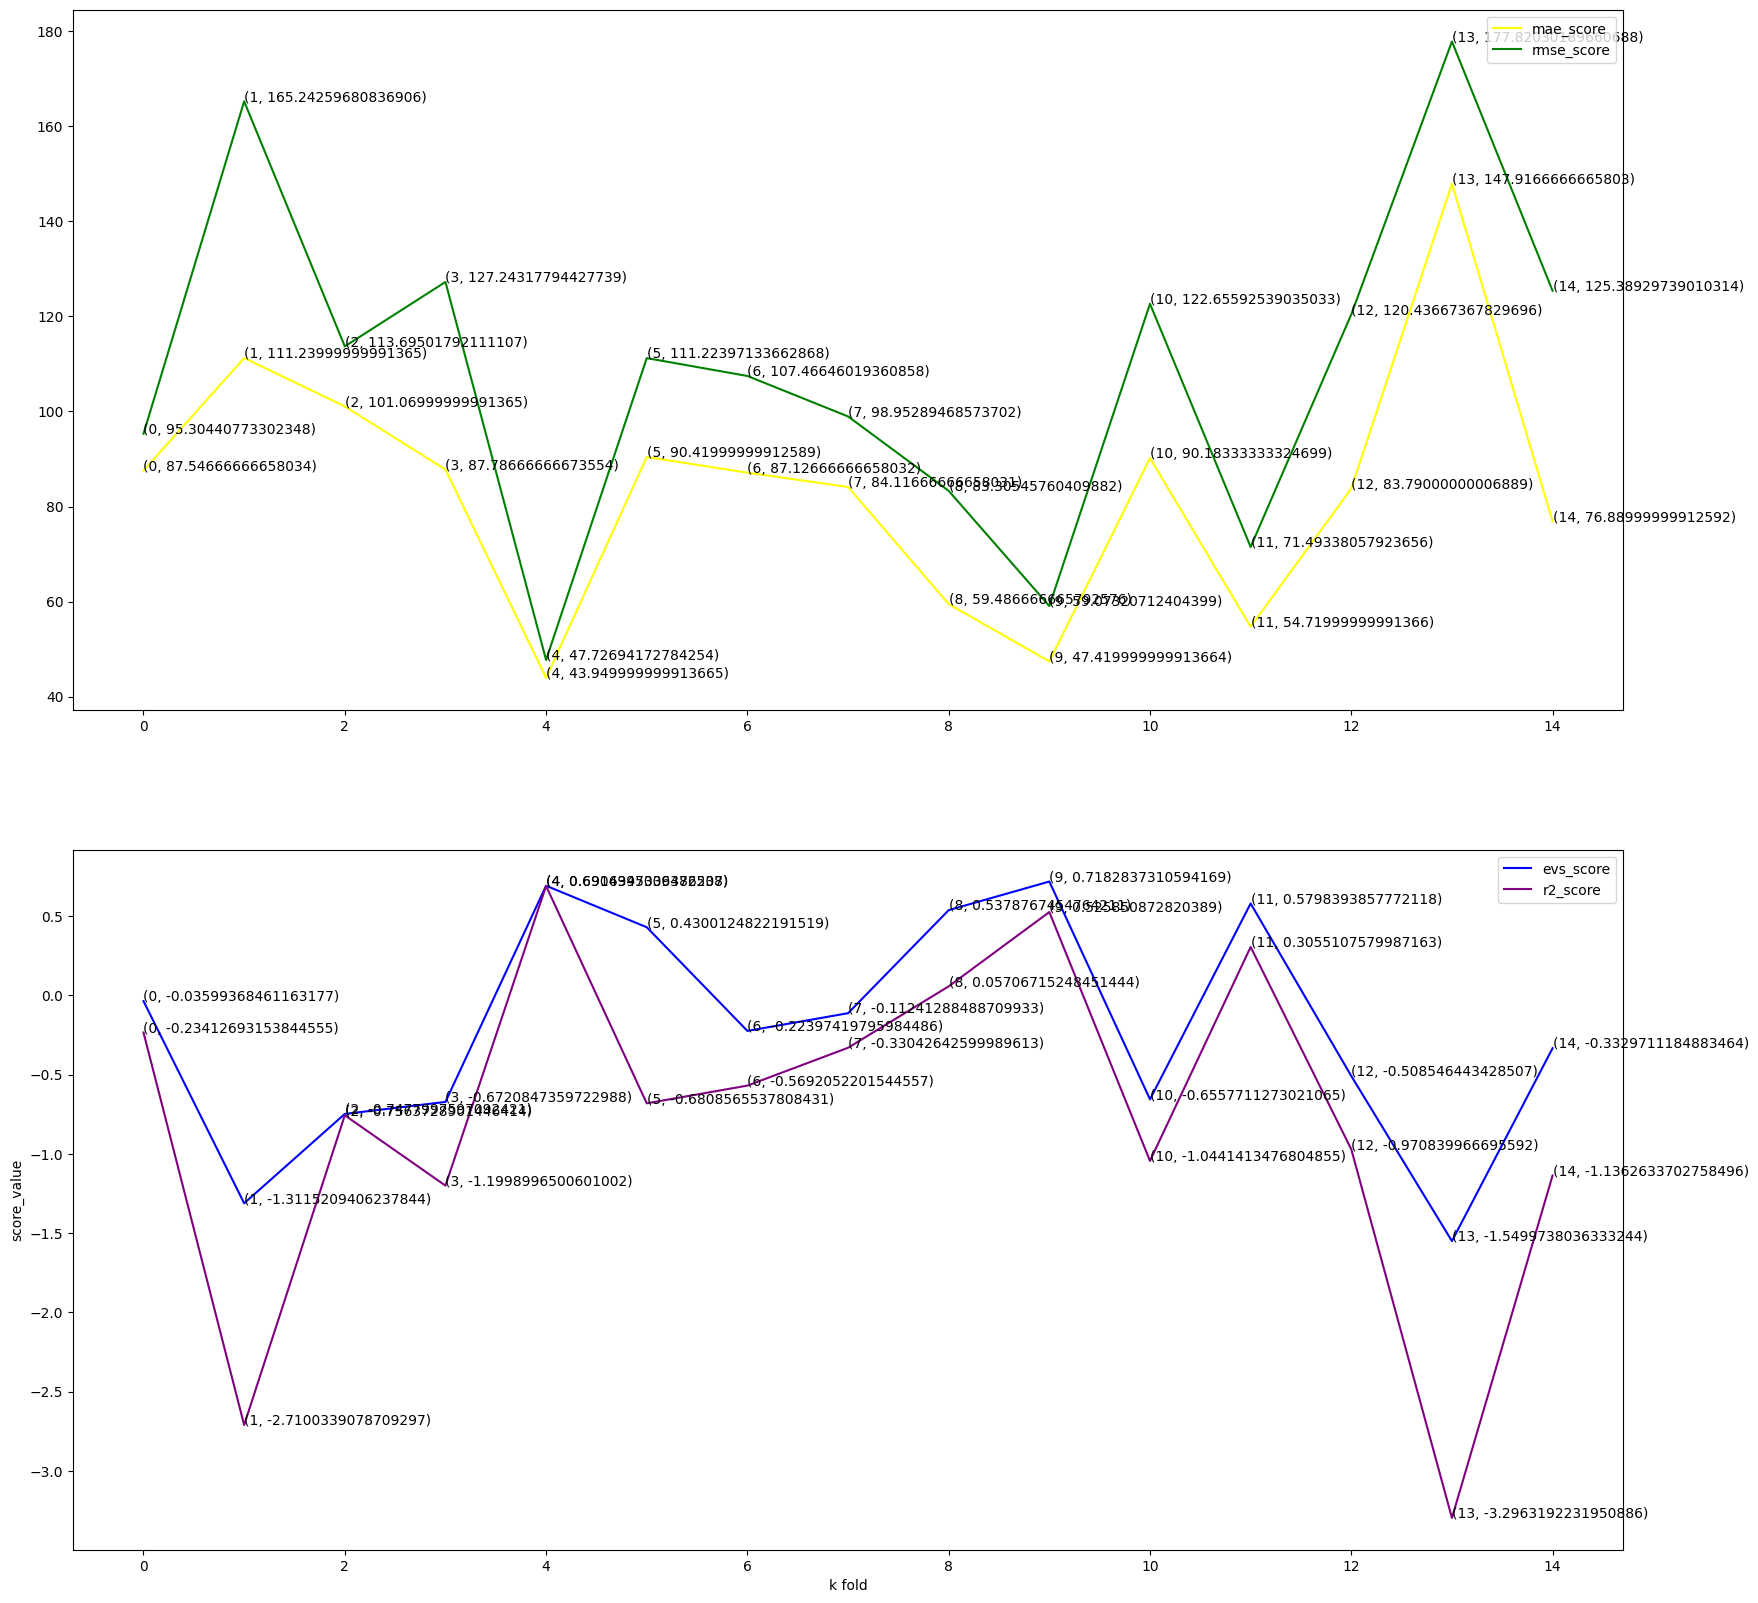

In [40]:
%matplotlib inline

import pandas as pd
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
# 计算不同的指标
def calc_metrics(y_test,y_pred):
    evs_score = explained_variance_score(y_pred, y_test)
    mae_score = mean_absolute_error(y_pred,y_test)
    rmse_score = math.sqrt(mean_squared_error(y_pred, y_test))
    r2score = r2_score(y_pred, y_test)
    return evs_score,mae_score,rmse_score,r2score

# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C-soft")
# 读取X，y
X = data.iloc[:,0:7]
y = data.iloc[:,7]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)


kfold_splits_num = 15
# k折训练，计算
kf = KFold(n_splits=kfold_splits_num, shuffle=True, random_state=36)

# 画图
plt.figure(figsize=(20,20))

evs_score_list,mae_score_list,rmse_score_list,r2score_list = [],[],[],[]
for index,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
     # 非线性回归
    ployfeat = PolynomialFeatures(degree=2)  # 根据degree的值转换为相应的多项式（非线性回归）
    model = LinearRegression()
    model.fit(ployfeat.fit_transform(X_train), y_train)
    scores = calc_metrics(y_test,y_pred)
    evs_score_list.append(scores[0])
    mae_score_list.append(scores[1])
    rmse_score_list.append(scores[2])
    r2score_list.append(scores[3])

plt.subplot(2,1,1)
plt.plot(range(kfold_splits_num),mae_score_list,label="mae_score",c="yellow")
plt.plot(range(kfold_splits_num),rmse_score_list,label="rmse_score",c="g")
plt.legend()

for x,y in zip(range(kfold_splits_num), mae_score_list):
    plt.annotate(str((x,y)), (x,y))
    
for x,y in zip(range(kfold_splits_num), rmse_score_list):
    plt.annotate(str((x,y)), (x,y))

plt.subplot(2,1,2)
plt.plot(range(kfold_splits_num),evs_score_list,label="evs_score",c="b")
plt.plot(range(kfold_splits_num),r2score_list,label="r2_score",c="purple")

# 给每个点添加坐标信息  
for x,y in zip(range(kfold_splits_num), evs_score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)


for x,y in zip(range(kfold_splits_num), r2score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)

print(max(evs_score_list),max(r2score_list))

plt.legend()
plt.xlabel("k fold")
plt.ylabel("score_value")
plt.show()
# print("Average MSE:", np.mean(mse))